In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [7]:
# Load the CSV file into a DataFrame
file_path = r"C:\Users\Admin\Downloads\dataset\amz_uk_price_prediction_dataset.csv"  # Use raw string by adding r in front of the path
# Load CSV into DataFrame
df = pd.read_csv(file_path)

In [11]:
df.shape

(2443651, 9)

In [12]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [14]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

                                   Category  Frequency
0                         Sports & Outdoors     836265
1                                    Beauty      19312
2    Handmade Clothing, Shoes & Accessories      19229
3                               Bath & Body      19092
4                            Birthday Gifts      18978
..                                      ...        ...
291                  Alexa Built-In Devices        107
292                       Motorbike Chassis        107
293                                   Plugs        107
294          Smart Home Security & Lighting        104
295                          Smart Speakers         54

[296 rows x 2 columns]
                                 Category  Frequency
0                       Sports & Outdoors     836265
1                                  Beauty      19312
2  Handmade Clothing, Shoes & Accessories      19229
3                             Bath & Body      19092
4                          Birthday Gifts      1897

<Axes: xlabel='category'>

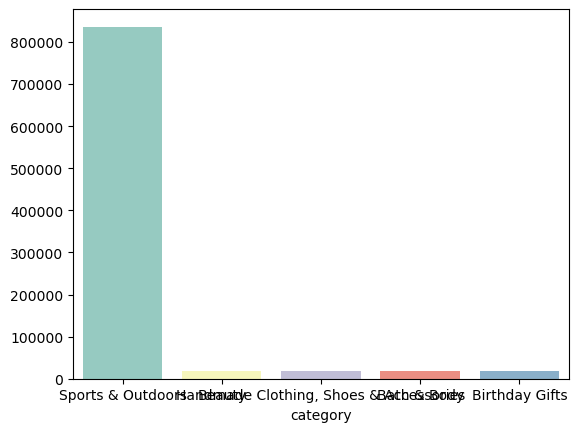

In [53]:
### Part 1: Understanding Product Categories
##**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

##1. **Frequency Tables**:
##    - Generate a frequency table for the product `category`.
##    - Which are the top 5 most listed product categories?

##2. **Visualizations**:
##    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
##    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

# Frequency table for 'Category'
# Generate the frequency table for product categories
category_freq = df['category'].value_counts().reset_index()
category_freq.columns = ['Category', 'Frequency']
print(category_freq)

# Top 5 most listed product categories
top_5_categories = category_freq.head(5)
print(top_5_categories)


# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
category_freq=df['category'].value_counts().head(5)
sns.barplot(x=category_freq.index, y=category_freq.values, palette="Set3")


pie Chart


<Axes: ylabel='count'>

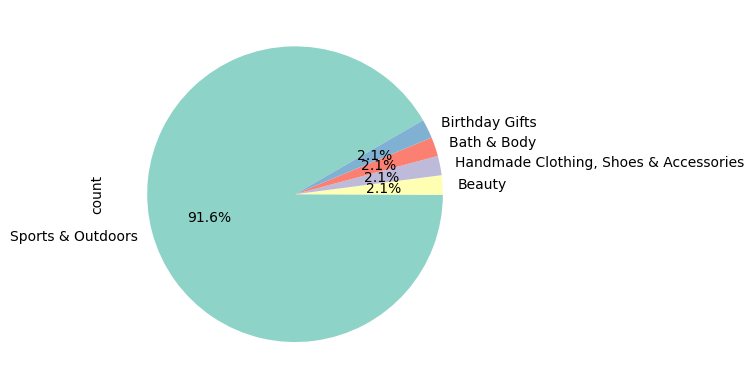

In [54]:
print("pie Chart")
# Plotting a pie chart of the 'category' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
df['category'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=30, colors=sns.color_palette("Set3"))

In [58]:
### Part 2: Delving into Product Pricing

##**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

##1. **Measures of Centrality**:
##    - Calculate the mean, median, and mode for the `price` of products.
##    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

##2. **Measures of Dispersion**:
##    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
##    - How varied are the product prices? Are there any indicators of a significant spread in prices?

##3. **Visualizations**:
##    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
##    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(mean_price, median_price, mode_price)


price_variance = df['price'].var()
price_std_dev = df['price'].std()
price_range = df['price'].max() - df['price'].min()
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(price_variance, price_std_dev, price_range, price_iqr)


89.24380943923663 19.09 9.99
119445.48532256528 345.60886175352226 100000.0 36.0


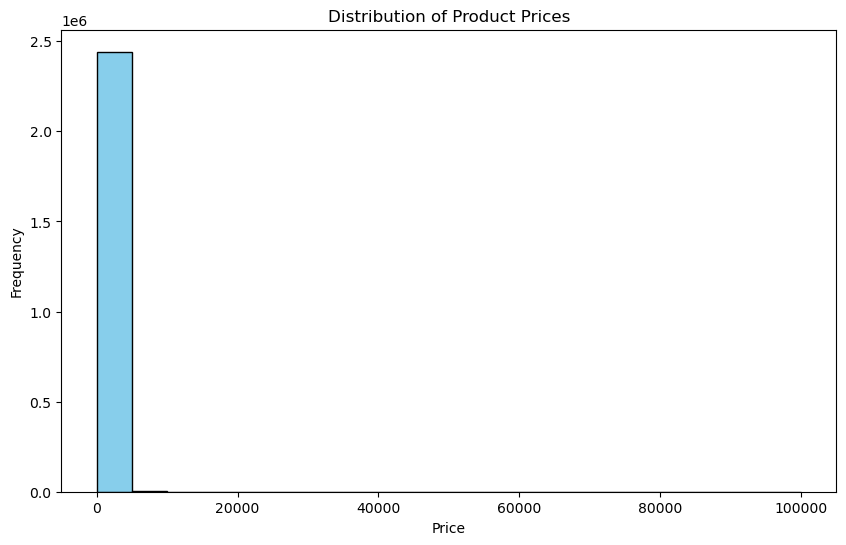

In [59]:
# Histogram for product prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.show()


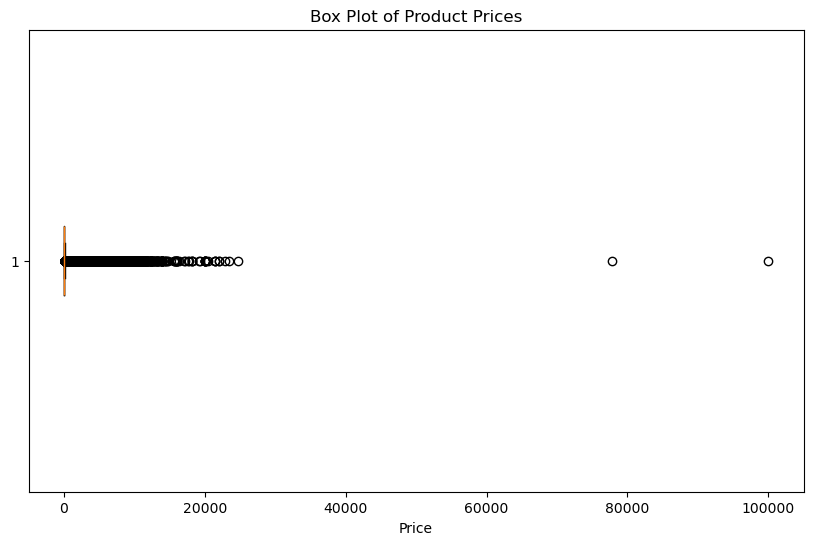

In [60]:
# Box plot for product prices
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False)
plt.xlabel('Price')
plt.title('Box Plot of Product Prices')
plt.show()

2.152836472966065 0.0 0.0
4.81743402976196 2.1948653785054697 4.4
0.08120735761080985 -1.9260061280432985


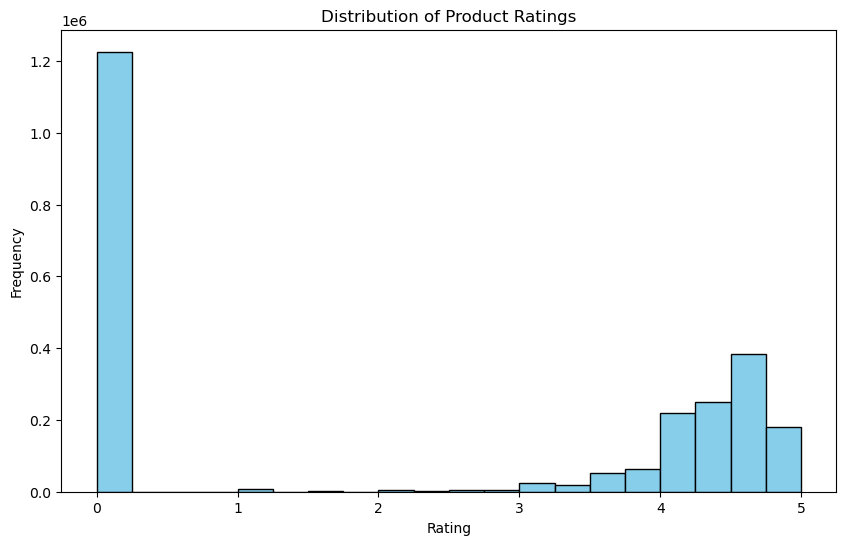

In [65]:
### Part 3: Unpacking Product Ratings

##**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

##1. **Measures of Centrality**:
##    - Calculate the mean, median, and mode for the `rating` of products.
##    - How do customers generally rate products? Is there a common trend?
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print(mean_rating, median_rating, mode_rating)
##2. **Measures of Dispersion**:
##    - Determine the variance, standard deviation, and interquartile range for product `rating`.
##    - Are the ratings consistent, or is there a wide variation in customer feedback?
rating_variance = df['stars'].var()
rating_std_dev = df['stars'].std()
rating_iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(rating_variance, rating_std_dev, rating_iqr)
##3. **Shape of the Distribution**:
##    - Calculate the skewness and kurtosis for the `rating` column. 
##    - Are the ratings normally distributed, or do they lean towards higher or lower values?
rating_skewness = df['stars'].skew()
rating_kurtosis = df['stars'].kurtosis()

print(rating_skewness, rating_kurtosis)
##4. **Visualizations**:
##    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

plt.figure(figsize=(10, 6))
plt.hist(df['stars'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()




